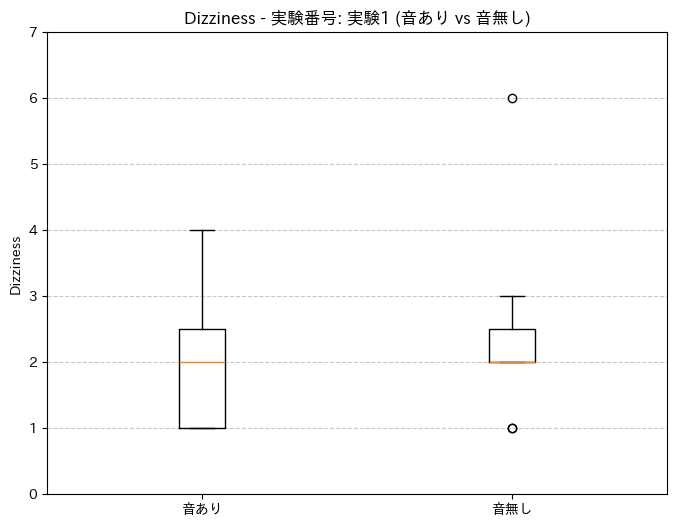

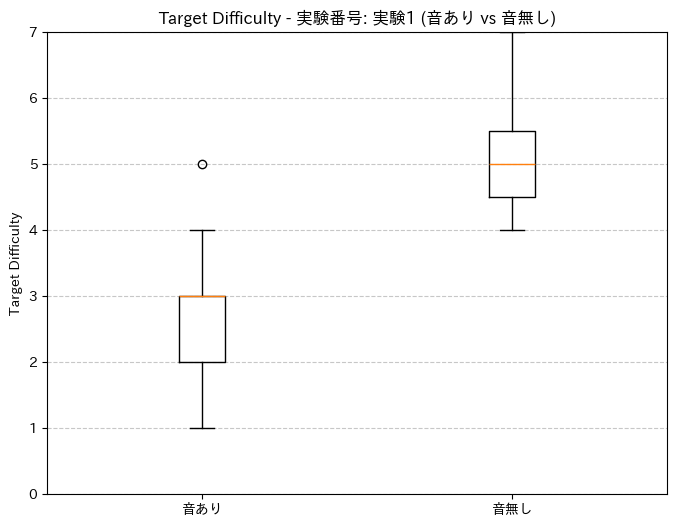

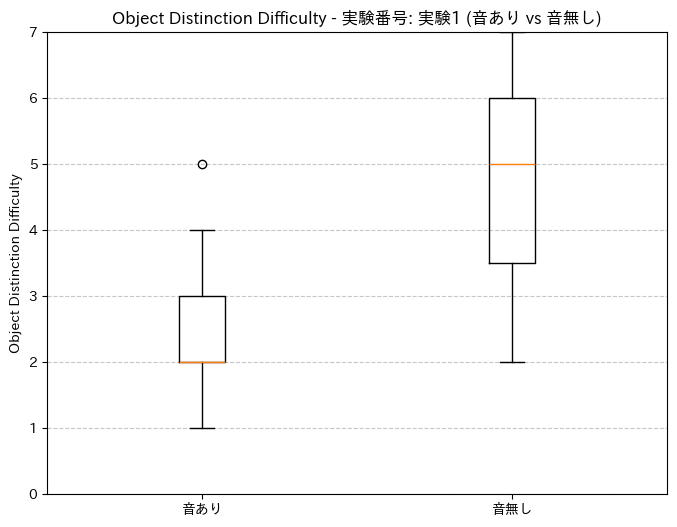

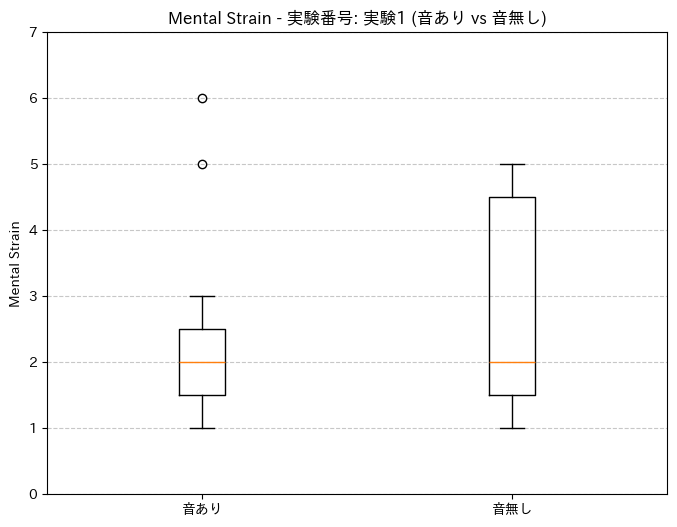

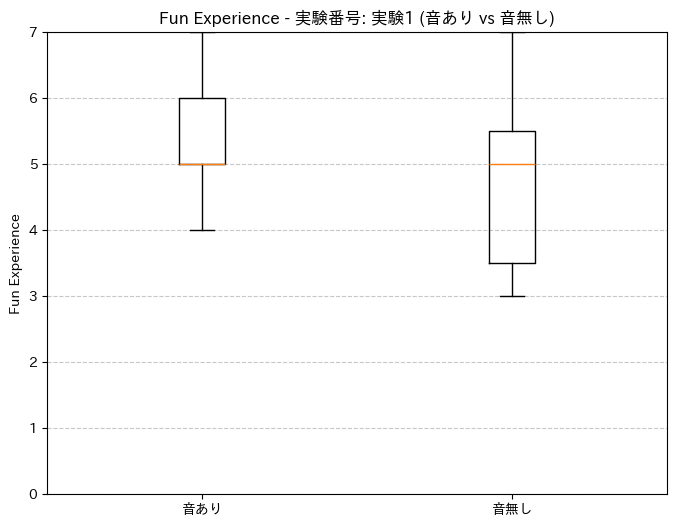

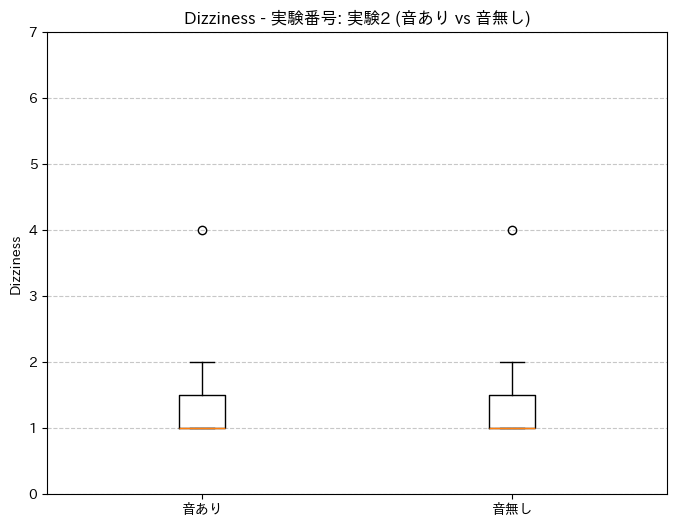

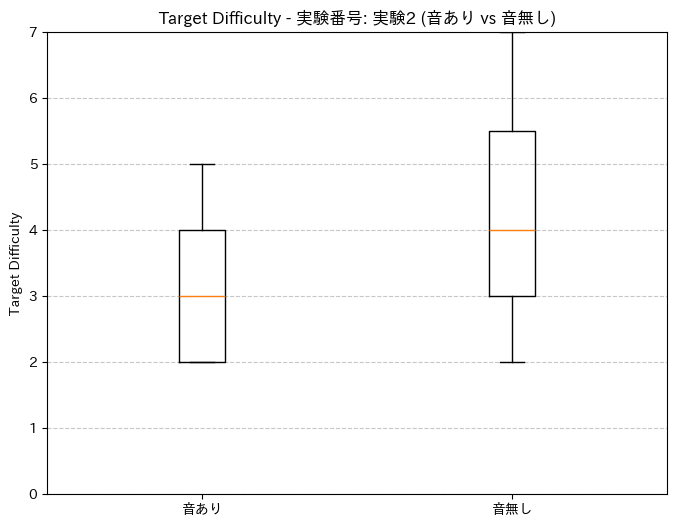

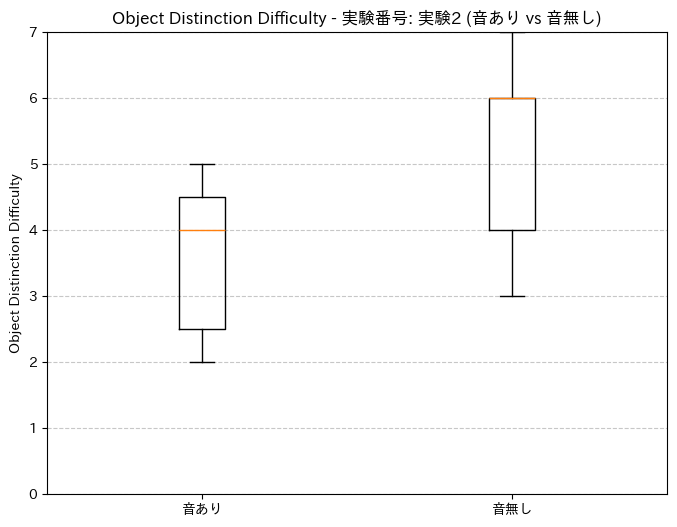

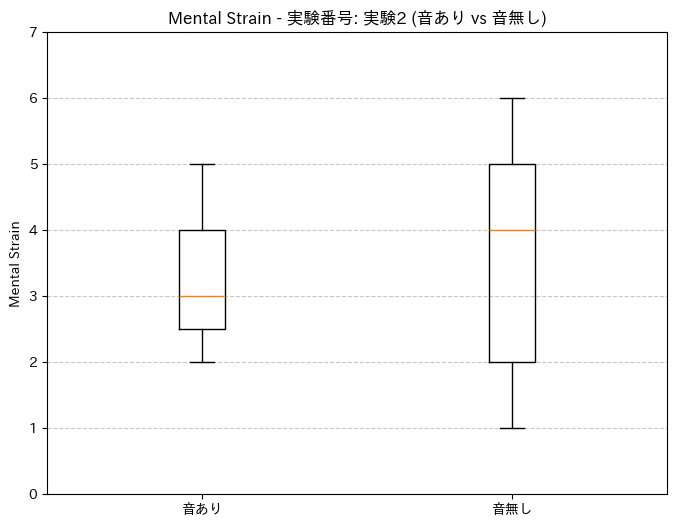

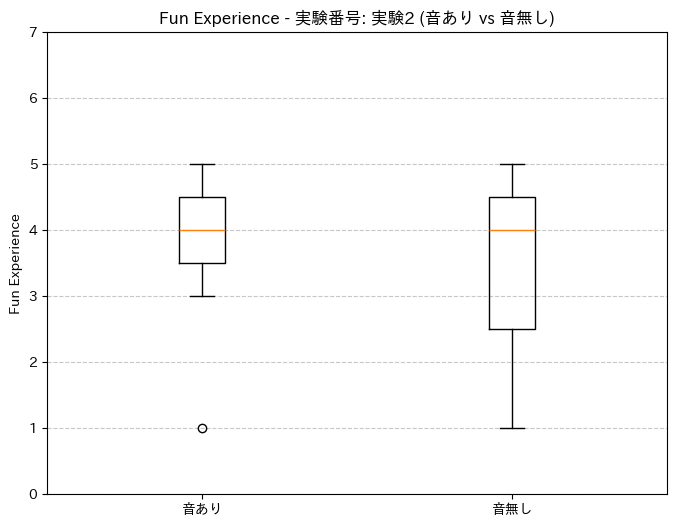

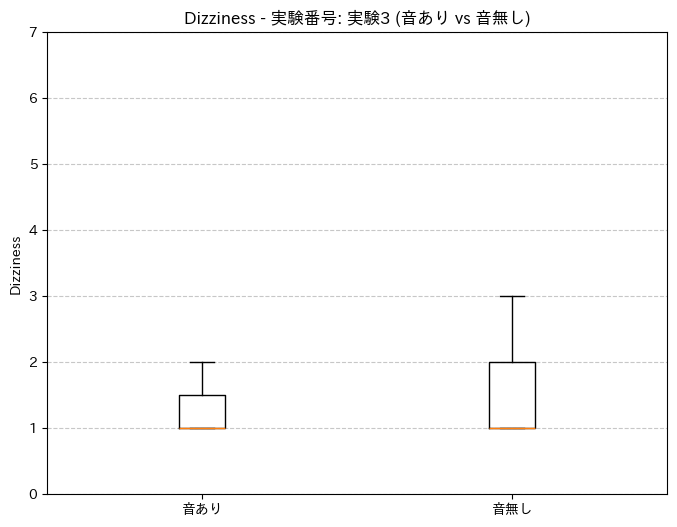

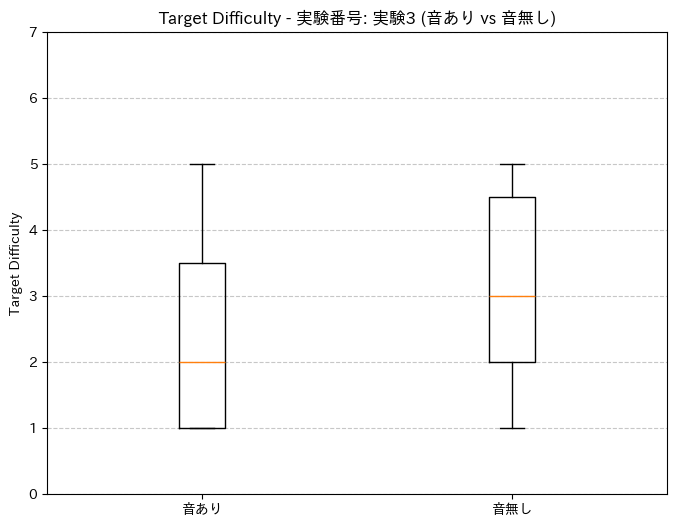

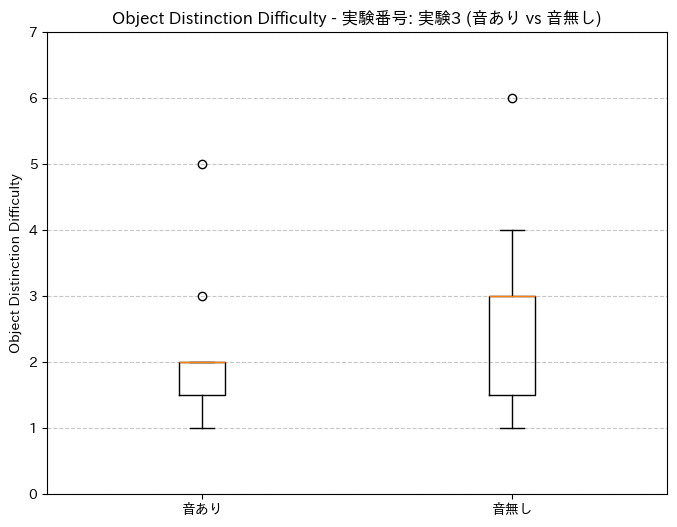

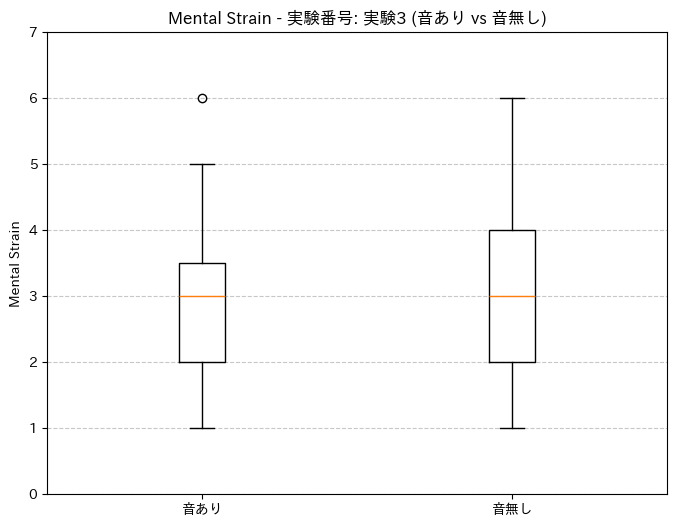

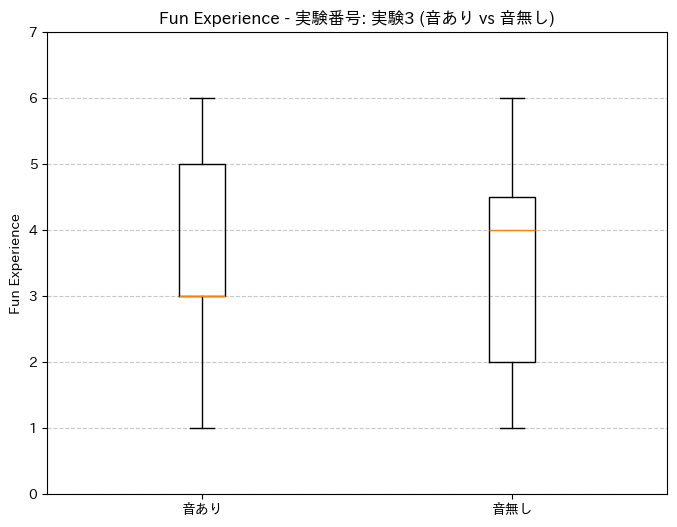

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

# Load and clean the data
file_path = '無題のフォーム（回答） - シート1 (3).csv'
data = pd.read_csv(file_path)
data.columns = data.columns.str.strip().str.replace('\n', '').str.replace(' ', '')

# Extract relevant columns
data_cleaned = data[['実験手順', '実験番号', 'どれくらい酔ったか？', 'どれくらいターゲットを取得するのが大変だったか？',
                     'どれくらい視野外物体の区別をするのが難しかったか？', '精神的にしんどかったですか？', 'どれくらい体験として楽しかったか？']]

data_cleaned.columns = ['Condition', 'Experiment', 'Dizziness', 'Target Difficulty', 'Object Distinction Difficulty', 
                        'Mental Strain', 'Fun Experience']

# Get unique experiment numbers
experiment_numbers = data_cleaned['Experiment'].unique()

# Metrics for evaluation
metrics = ['Dizziness', 'Target Difficulty', 'Object Distinction Difficulty', 'Mental Strain', 'Fun Experience']

# Plot boxplots for each experiment number
for experiment in experiment_numbers:
    experiment_data = data_cleaned[data_cleaned['Experiment'] == experiment]
    sound_on = experiment_data[experiment_data['Condition'] == '音あり']
    sound_off = experiment_data[experiment_data['Condition'] == '音無し']

    for metric in metrics:
        plt.figure(figsize=(8, 6))
        plt.boxplot([sound_on[metric].dropna(), sound_off[metric].dropna()], labels=['音あり', '音無し'])
        plt.title(f'{metric} - 実験番号: {experiment} (音あり vs 音無し)')
        plt.ylabel(metric)
        plt.ylim(0,7)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
